In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Connecting to Data Folder.
%cd /content/drive/MyDrive/commonlit-evaluate-student-summaries

/content/drive/MyDrive/commonlit-evaluate-student-summaries


In [ ]:
### Installing required packages
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
promptstrain = pd.read_csv ('prompts_train.csv') #Reading prompts_train csv file
promptstrain.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [ ]:
summariestrain = pd.read_csv('summaries_train.csv') #Reading summaries_train csv file
summariestrain.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [ ]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }
df_summaries_prompt = pd.merge(summariestrain, promptstrain, on='prompt_id') #Merging both data frames on prompt_id
df_summaries_prompt

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...


## **Section 2: Features (Q2 and Q3, 25 points total)**

In [ ]:
# Calculating Number of words in student response (text)
df_summaries_prompt['text_words'] = df_summaries_prompt['text'].apply(lambda n: len(n.split()))
# Calculating Number of words in prompt (prompt_text)
df_summaries_prompt['prompt_text_words'] = df_summaries_prompt['prompt_text'].apply(lambda n: len(n.split()))
# Calculating Number of distinct words in student response (text)
df_summaries_prompt['text_distinct_words'] = df_summaries_prompt['text'].apply(lambda n: len(set(n.split())))
# Calculating Number of distinct words in prompt (prompt_text)
df_summaries_prompt['prompt_text_distinct_words'] = df_summaries_prompt['prompt_text'].apply(lambda n: len(set(n.split())))
# Calculating Number of words common to student response (text) and prompt (prompt_text)
df_summaries_prompt['Common_text_prompt_text'] = df_summaries_prompt.apply(lambda n: len(set(n['text'].split()).intersection(set(n['prompt_text'].split()))), axis =1)
# Calculating Number of words common to student response (text) and prompt_question
df_summaries_prompt['Common_text_prompt_question'] = df_summaries_prompt.apply(lambda n: len(set(n['text'].split()).intersection(set(n['prompt_question'].split()))), axis =1)
# Calculating Number of words common to student response (text) and prompt_title
df_summaries_prompt['Common_text_prompt_title'] = df_summaries_prompt.apply(lambda n: len(set(n['text'].split()).intersection(set(n['prompt_title'].split()))), axis =1)

df_summaries_prompt

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_words,prompt_text_words,text_distinct_words,prompt_text_distinct_words,Common_text_prompt_text,Common_text_prompt_question,Common_text_prompt_title
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,51,300,21,5,1
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,138,300,46,9,3
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,50,300,29,5,1
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,59,300,36,7,1
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,25,300,15,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,33,604,30,303,20,0,0
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,30,604,27,303,18,3,0
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,29,604,22,303,17,0,0
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,49,604,35,303,21,2,0


## **Section 3: Content and Wording (Q4, 10 points)**

Adding Extra features:

=> Finding total number of words for each parts of speech using nltk libraries

=> Finding total number of sentences in summary using sent_tokenize

=> Finding total number of syllables in each summary

=> Finding percentage of Complex words present in each summary. Words with greater than 3 syllables are considered as complex words.

=> Finding average number of words present in each sentence.

=> Finding percentage of non stopping words present in each summary.

=> Calculating Flesch-Kincaid Reading Index for each summary.

=> Finding relation score between summary and essay.

In [ ]:
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate number of words in each parts of speech
def POS_count(pos_tags):
  pos_counts = {}
  for word, pos in pos_tags:
    if pos in pos_counts:
        pos_counts[pos] += 1
    else:
        pos_counts[pos] = 1
  return pos_counts

# Function to calculate number of syllables
def countSyllables(word):
    word = word.lower()
    syllablecount = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        syllablecount += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllablecount += 1
    if word.endswith("e"):
        syllablecount -= 1
    if syllablecount == 0:
        syllablecount += 1
    return syllablecount

#BEGIN[ChatGPT GPT-4][https://chat.openai.com/c/cb51b851-5504-48ca-86ce-0408d13dea1c]"Example code to find relation score between essay and summary"
# Function to calculate relation score between summary and essay
def relation_essay_summary_func(essay, summary):
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform([essay, summary])
  cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
  return cosine_sim[0][0]
#END[ChatGPT]

df_summaries_prompt['POS_text'] = df_summaries_prompt['text'].apply(lambda n: pos_tag([word for word in word_tokenize(n) if word.lower() not in stopwords.words("english")]))
df_summaries_prompt['Number_of_POS'] = df_summaries_prompt['POS_text'].apply(lambda n: POS_count(n))
df_summaries_prompt['sentences_count'] = df_summaries_prompt['text'].apply(lambda n : len(sent_tokenize(n)))
df_summaries_prompt['syllables_count'] = df_summaries_prompt['text'].apply(lambda n : countSyllables(n))
df_summaries_prompt['split_sentences'] = df_summaries_prompt['text'].apply(lambda n : sent_tokenize(n))
df_summaries_prompt['complex_words'] = df_summaries_prompt['split_sentences'].apply(lambda n : [word for sentence in n for word in sentence.split() if countSyllables(word) >= 3])
df_summaries_prompt['percentage_complex_words'] = (df_summaries_prompt['complex_words'].apply(lambda n : len(n)) / df_summaries_prompt['text_words']) * 100
df_summaries_prompt['average_no_of_words_in_sentence'] = df_summaries_prompt['text_words']/df_summaries_prompt['sentences_count']
df_summaries_prompt['percentage_non_stopping_words'] = (df_summaries_prompt['text'].apply(lambda n: len([word for word in word_tokenize(n) if word.lower() not in stopwords.words("english")]))/df_summaries_prompt['text_words'])*100
df_summaries_prompt['readability_index'] = 0.39*(df_summaries_prompt['text_words']/df_summaries_prompt['sentences_count'])+11.8*(df_summaries_prompt['syllables_count']/df_summaries_prompt['text_words'])-15.59
df_summaries_prompt['relation_essay_summary'] = df_summaries_prompt.apply(lambda row: relation_essay_summary_func(row['prompt_text'], row['text']), axis=1)

#Dropping unwanted columns
columns_to_drop = ['POS_text','split_sentences','complex_words']
df_summaries_prompt = df_summaries_prompt.drop(columns= columns_to_drop)

df_summaries_prompt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_words,prompt_text_words,...,Common_text_prompt_question,Common_text_prompt_title,Number_of_POS,sentences_count,syllables_count,percentage_complex_words,average_no_of_words_in_sentence,percentage_non_stopping_words,readability_index,relation_essay_summary
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,596,...,5,1,"{'JJ': 8, 'VBP': 3, 'NNS': 5, 'VBD': 4, 'CD': ...",4,100,13.114754,15.250000,63.934426,9.701762,0.414777
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,203,596,...,9,3,"{'JJ': 10, 'NNP': 11, 'VBD': 9, 'RB': 7, 'NNS'...",14,352,18.719212,14.500000,67.980296,10.526084,0.714402
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,596,...,5,1,"{'JJ': 3, 'NN': 8, 'VBD': 5, 'IN': 1, 'RB': 3,...",3,98,13.333333,20.000000,65.000000,11.483333,0.513356
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,596,...,7,1,"{'NNS': 3, 'RB': 3, 'JJ': 8, 'VBG': 1, ',': 5,...",3,123,13.157895,25.333333,63.157895,13.387368,0.670896
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,596,...,5,1,"{'JJ': 4, 'NN': 4, 'VBD': 3, 'RB': 2, 'NNS': 1...",2,42,11.111111,13.500000,62.962963,8.030556,0.450628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,33,604,...,0,0,"{'VBN': 1, 'JJ': 3, 'NN': 7, ',': 1, 'VBZ': 1,...",1,54,12.121212,33.000000,54.545455,16.589091,0.278090
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,30,604,...,3,0,"{'NNP': 1, 'JJ': 3, 'NN': 7, 'CD': 2, ',': 2, ...",1,48,10.000000,30.000000,60.000000,14.990000,0.335654
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,29,604,...,0,0,"{'NN': 7, 'JJ': 4, 'RB': 2, '.': 1}",1,43,6.896552,29.000000,48.275862,13.216552,0.317723
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,49,604,...,2,0,"{'NNP': 2, 'VBD': 2, 'JJ': 9, 'NNS': 2, 'VBP':...",2,91,22.448980,24.500000,65.306122,15.879286,0.524103


## **Histogram for Content**

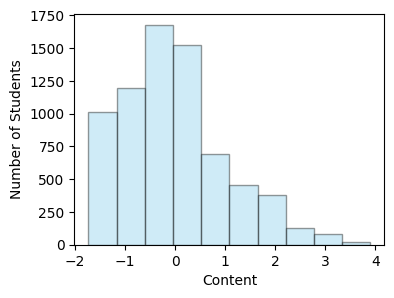

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(df_summaries_prompt['content'], bins=10, color='skyblue',edgecolor='black', alpha=0.4)
plt.xlabel('Content')
plt.ylabel('Number of Students')
plt.show()

Observations:
The histogram plot illustrates that the range of content scores spans from -1.73 to 3.9. Range of Content is 5.63. Notably, the majority of students tend to have content scores clustered in the range of approximately -0.5 to 0, while a distinct minority of students achieved content scores exceeding 1.

## **Histogram for Wording**

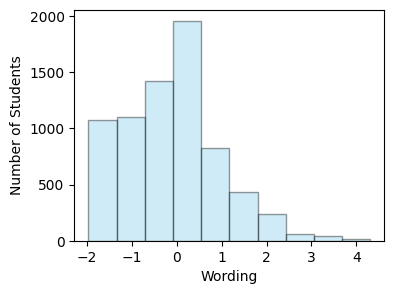

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(df_summaries_prompt['wording'], bins=10, color='skyblue', edgecolor = 'black', alpha=0.4)
plt.xlabel('Wording')
plt.ylabel('Number of Students')
plt.show()

Observations: The histogram plot illustrates that the range of wording scores spans from -1.96 to 4.31. Range of Wording is 6.27. Notably, the majority of students tend to have wording scores clustered in the range of approximately -0.5 to 0, while a distinct minority of students achieved wording scores exceeding 1.

## **Histogram of Content for each prompt**

array([[<Axes: title={'center': 'Egyptian Social Structure'}>,
        <Axes: title={'center': 'Excerpt from The Jungle'}>],
       [<Axes: title={'center': 'On Tragedy'}>,
        <Axes: title={'center': 'The Third Wave'}>]], dtype=object)

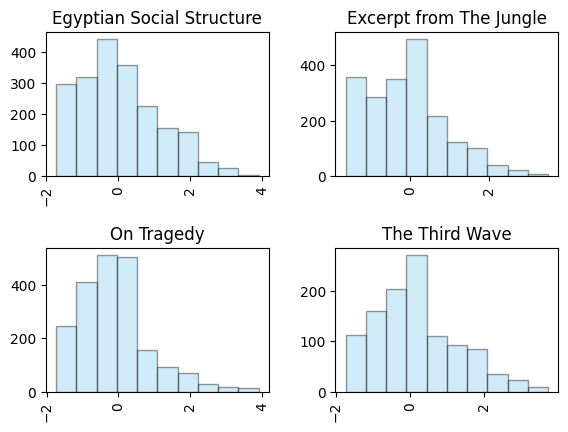

In [ ]:
df_summaries_prompt.hist("content", by='prompt_title', color='skyblue', edgecolor = 'black', alpha=0.4 )

The above histograms enable us to visually assess the distribution of "content" scores across various essay prompts. This visualization facilitates a comparative analysis, allowing us to evaluate the performance of students in response to each specific prompt.

## **Histogram of Wording for each prompt**

array([[<Axes: title={'center': 'Egyptian Social Structure'}>,
        <Axes: title={'center': 'Excerpt from The Jungle'}>],
       [<Axes: title={'center': 'On Tragedy'}>,
        <Axes: title={'center': 'The Third Wave'}>]], dtype=object)

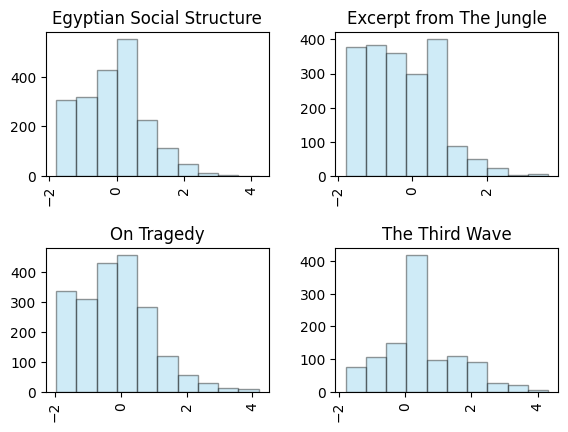

In [ ]:
df_summaries_prompt.hist("wording", by='prompt_title', color='skyblue', edgecolor = 'black', alpha=0.4 )

The above histograms enable us to visually assess the distribution of "wording" scores across various essay prompts. This visualization facilitates a comparative analysis, allowing us to evaluate the performance of students in response to each specific prompt.

## **Scatter Plot between Content and Wording**

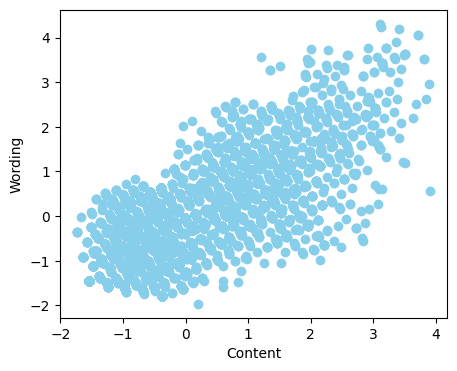

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df_summaries_prompt['content'], df_summaries_prompt['wording'], label='Scatter Plot', color='skyblue', marker='o')
plt.xlabel('Content')
plt.ylabel('Wording')
plt.show()

The data points for "content" and "wording" fall within the range of -2 to 4 on the plot. These points exhibit a noticeable upward-sloping pattern from the left side to the right side of the plot. The clustering of dots is more concentrated towards the lower-left section of the plot, indicating a strong positive correlation. In simpler terms, as one progress along the x-axis from left to right, there is an increase in the corresponding y-values.

## **Correlation between Content and Wording**

In [ ]:
correlation = df_summaries_prompt['content'].corr(df_summaries_prompt['wording'])
print(f"Correlation between content and wording: {correlation}")

Correlation between content and wording: 0.7513804859701969


Content and Wording are highly positive correlated with correlation coefficient of 0.75 which means summary with good content score has good wording score too and vice versa

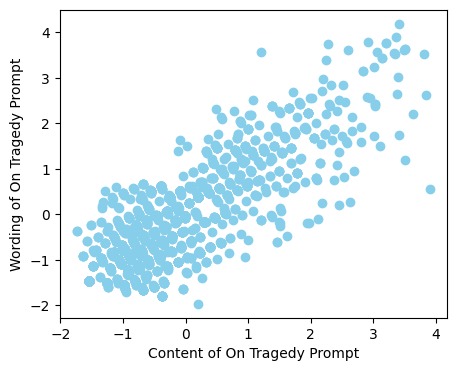

In [ ]:
plt.figure(figsize=(5, 4))
OnTragedydf = df_summaries_prompt[df_summaries_prompt['prompt_id'] == '39c16e']
plt.scatter(OnTragedydf['content'], OnTragedydf['wording'], label='Scatter Plot', color='skyblue', marker='o')
plt.xlabel('Content of On Tragedy Prompt')
plt.ylabel('Wording of On Tragedy Prompt')
plt.show()

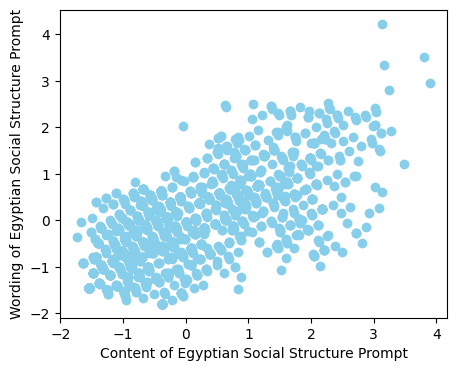

In [ ]:
plt.figure(figsize=(5, 4))
EgyptianSocialStructuredf = df_summaries_prompt[df_summaries_prompt['prompt_id'] == '3b9047']
plt.scatter(EgyptianSocialStructuredf['content'], EgyptianSocialStructuredf['wording'], label='Scatter Plot', color='skyblue', marker='o')
plt.xlabel('Content of Egyptian Social Structure Prompt')
plt.ylabel('Wording of Egyptian Social Structure Prompt')
plt.show()

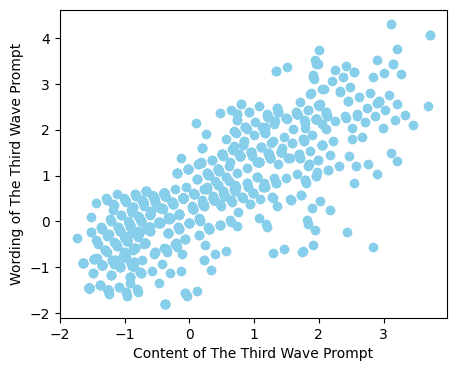

In [ ]:
plt.figure(figsize=(5, 4))
TheThirdWavedf = df_summaries_prompt[df_summaries_prompt['prompt_id'] == '814d6b']
plt.scatter(TheThirdWavedf['content'], TheThirdWavedf['wording'], label='Scatter Plot', color='skyblue', marker='o')
plt.xlabel('Content of The Third Wave Prompt')
plt.ylabel('Wording of The Third Wave Prompt')
plt.show()

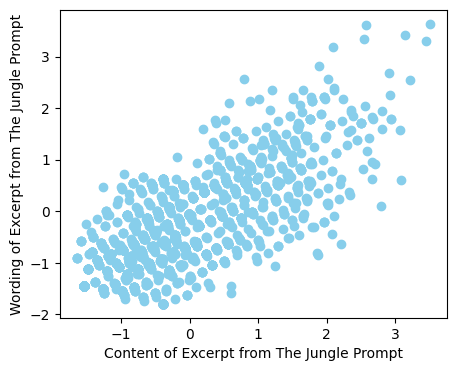

In [ ]:
plt.figure(figsize=(5, 4))
ExcerptfromTheJungledf = df_summaries_prompt[df_summaries_prompt['prompt_id'] == 'ebad26']
plt.scatter(ExcerptfromTheJungledf['content'], ExcerptfromTheJungledf['wording'], label='Scatter Plot', color='skyblue', marker='o')
plt.xlabel('Content of Excerpt from The Jungle Prompt')
plt.ylabel('Wording of Excerpt from The Jungle Prompt')
plt.show()

Observation: Based on all scatter plots for each prompt, it is observed that shapes of these distributions differ for the different prompts

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')

# Calculating mean of content and wording
content_median = df_summaries_prompt['content'].median()
wording_median = df_summaries_prompt['wording'].median()

good_summaries = []
bad_summaries = []

# Classifying into good and bad summaries based on mean, if content and wording greater than mean considered as good else bad
for index, row in df_summaries_prompt.iterrows():
    if row['content'] > content_median and row['wording'] > wording_median:
        good_summaries.append(row['text'])
    else:
        bad_summaries.append(row['text'])
#BEGIN[ChatGPT GPT-4][https://chat.openai.com/c/cb51b851-5504-48ca-86ce-0408d13dea1c]"Example on how to use TF-IDF to find over represented words by excluding stop words in summary"
#Excluding stopping words
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix_good = tfidf.fit_transform(good_summaries)
all_feature_names = tfidf.get_feature_names_out()
# Creating a DataFrame to store TF-IDF values
tfidf_dataframe_good = pd.DataFrame(tfidf_matrix_good.toarray(), columns=all_feature_names)
# Calculating the mean
tfidf_mean_good = tfidf_dataframe_good.mean()
#END[ChatGPT]

tfidf_matrix_bad = tfidf.fit_transform(bad_summaries)
all_feature_names = tfidf.get_feature_names_out()
tfidf_dataframe_bad = pd.DataFrame(tfidf_matrix_bad.toarray(), columns=all_feature_names)
tfidf_mean_bad = tfidf_dataframe_bad.mean()

# Sorting words by mean TF-IDF score in descending order to find over-represented words
overrepresented_words_good = tfidf_mean_good.sort_values(ascending=False)
overrepresented_words_bad = tfidf_mean_bad.sort_values(ascending=False)

print("Over Represented Words in good summaries are:" )
print(overrepresented_words_good.head(30))
print("Under Represented Words in bad summaries are:" )
print(overrepresented_words_bad.tail(30))
print("Under Represented Words in good summaries are:" )
print(overrepresented_words_good.tail(30))
print("Over Represented Words in bad summaries are:" )
print(overrepresented_words_bad.head(30))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Over Represented Words in good summaries are:
meat          0.067260
tragedy       0.045572
students      0.035622
spoiled       0.034181
good          0.030938
gods          0.030317
bad           0.030232
people        0.029627
slaves        0.027193
character     0.026330
experiment    0.026219
class         0.025449
farmers       0.025220
government    0.025143
social        0.025014
nobles        0.024088
ideal         0.023478
jones         0.023209
plot          0.021967
like          0.021195
paragraph     0.020601
aristotle     0.020464
make          0.020156
pity          0.020008
smell         0.019960
fear          0.019789
element       0.019388
wave          0.018141
pyramid       0.017821
pharaoh       0.017535
dtype: float64
Under Represented Words in bad summaries are:
gate           0.000026
baby           0.000026
sheperd        0.000026
gouged         0.000026
496            0.000026
comedically    0.000025
gilded         0.000025
blending       0.000024
spoiledd   

The statistic that is used here is Median and TfidfVectorizer. Sorted all summaries into good and bad based on median. If the summary's content and wording is above median, then it is categorised as good summary, else bad summary. Now calculated TF-IDF mean for both good and bad summaries and calculated TF-IDF scores for each word in good and bad summaries and computed over represented and under represented words in good and bad summaries

## **Section 5: Three Interesting Plots (Q6, 15 points)**

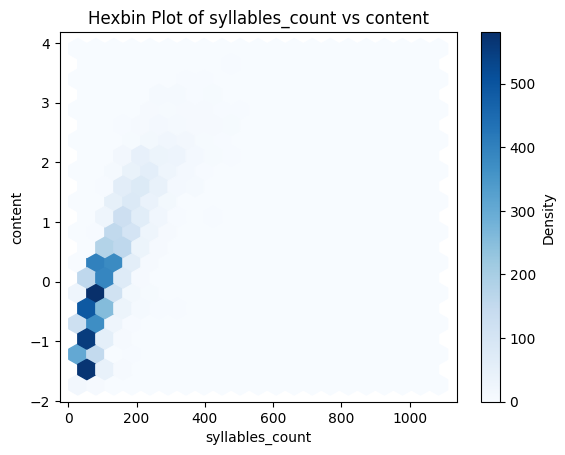

In [ ]:
plt.hexbin(df_summaries_prompt['syllables_count'], df_summaries_prompt['content'], gridsize=20, cmap='Blues')
plt.xlabel('syllables_count')
plt.ylabel('content')
plt.title('Hexbin Plot of syllables_count vs content')
plt.colorbar(label='Density')
plt.show()

From the plot, it is evident that the region with the highest density corresponds to content values ranging from -1.5 to -0.5. Furthermore, the plot's shape suggests a positive correlation between syllable counts and content values, indicating that as syllable counts increase, content values tend to be higher.

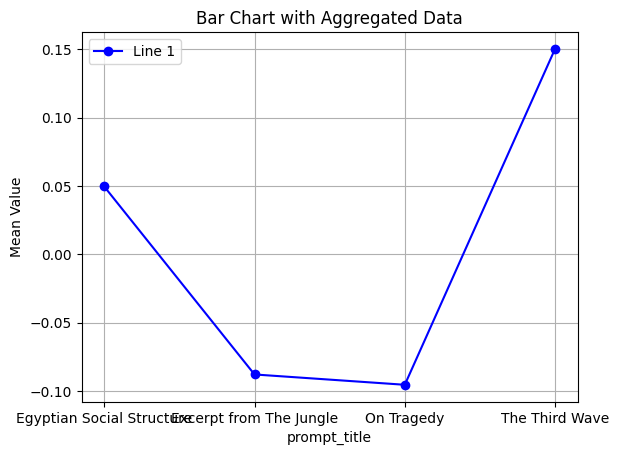

In [ ]:
agg_df = df_summaries_prompt.groupby('prompt_title')['content'].mean().reset_index()
plt.plot(agg_df['prompt_title'], agg_df['content'], label='Line 1', linestyle='-', marker='o', color='b')
plt.xlabel('prompt_title')
plt.ylabel('Mean Value')
plt.title('Bar Chart with Aggregated Data')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

The plot reveals that students who chose to write essays on "The Third Wave" tend to achieve higher scores compared to those who selected other essays.
Coversely The plot reveals that students who chose to write essays on "On Tragedy" tend to achieve lower scores compared to those who selected other essays

In [ ]:
# Corelation of All Features
corrmat=df_summaries_prompt.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,cmap="Blues",square=True,annot=True)

plt.title('Correlation of All Features')

# Show the plot
plt.show()

NameError: ignored

The above matrix represents a correlation matrix or a heatmap of correlations between all features used in the dataset.

The cell at the intersection of "content" and "wording" has a correlation coefficient of approximately 0.751380, indicating a strong positive linear relationship between these two features. This suggests that if student scored high content value, then he probably scored high wording too and vice versa.

The cell at the intersection of "text_distinct_words" and "Common_text_prompt_text" has highest correlation coefficient of 0.902999, indicating that students who have used more distinct words in their summaries have more words in common with prompt text


## **Section 6: Baseline Model (Q7, 10 points)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ["text_words","prompt_text_words","text_distinct_words","prompt_text_distinct_words","Common_text_prompt_text","Common_text_prompt_question","Common_text_prompt_title"]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train_content, y_test_content, y_train_wording, y_test_wording = train_test_split(
    df_summaries_prompt[features], df_summaries_prompt["content"], df_summaries_prompt["wording"], test_size=0.2, random_state=42
)

linear_content_model = LinearRegression()
linear_wording_model = LinearRegression()

# Train the models on the training data
linear_content_model.fit(X_train, y_train_content)
linear_wording_model.fit(X_train, y_train_wording)

# Make predictions on the testing data
y_predict_content = linear_content_model.predict(X_test)
y_predict_wording = linear_wording_model.predict(X_test)

# Calculate mean squared error for content and wording models
mean_squared_error_content = mean_squared_error(y_test_content, y_predict_content)
mean_squared_error_wording = mean_squared_error(y_test_wording, y_predict_wording)

# Report mean squared error for each model
print("Mean Squared Error for Content using Linear Regression Model before pre processing and normalizing data :", mean_squared_error_content)
print("Mean Squared Error for Content using Linear Regression Model before pre processing and normalizing data :", mean_squared_error_wording)

Mean Squared Error for Content using Linear Regression Model before pre processing and normalizing data : 0.3089124917060883
Mean Squared Error for Content using Linear Regression Model before pre processing and normalizing data : 0.4820126581010424


Observations:

The Mean Squared Error (MSE) observed for "Content" and "Wording" is high.
This can be attributed to multiple factors.

Firstly, the features selected might not be the most optimal for accurate predictions. Additionally, the absence of comprehensive data preprocessing and normalization techniques has likely resulted in suboptimal data quality, thereby adversely affecting the model's performance.

Furthermore, the absence of advanced Natural Language Processing (NLP) techniques has contributed to reduced predictive accuracy.

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Intializing Scaler
minmaxscaler = MinMaxScaler(feature_range=(0, 50))
standardscaler = StandardScaler()
robustscaler = RobustScaler()
columns_for_normalization = ["text_words","prompt_text_words","text_distinct_words","prompt_text_distinct_words","Common_text_prompt_text","Common_text_prompt_question",
                             "Common_text_prompt_title", "content", "wording","sentences_count","syllables_count","percentage_complex_words","average_no_of_words_in_sentence",
                             "percentage_non_stopping_words","readability_index","relation_essay_summary"]

# Using 3 normalize scalers to preprocess and normalize to get best results in predictions
df_summaries_prompt[columns_for_normalization] = minmaxscaler.fit_transform(df_summaries_prompt[columns_for_normalization])
df_summaries_prompt[columns_for_normalization] = standardscaler.fit_transform(df_summaries_prompt[columns_for_normalization])
df_summaries_prompt[columns_for_normalization] = robustscaler.fit_transform(df_summaries_prompt[columns_for_normalization])

df_summaries_prompt_preprocessed = pd.DataFrame(data= df_summaries_prompt, columns=columns_for_normalization)

df_summaries_prompt_preprocessed

,text_words,prompt_text_words,text_distinct_words,prompt_text_distinct_words,Common_text_prompt_text,Common_text_prompt_question,Common_text_prompt_title,content,wording,sentences_count,syllables_count,percentage_complex_words,average_no_of_words_in_sentence,percentage_non_stopping_words,readability_index,relation_essay_summary
0,0.056604,-0.019231,0.21875,-0.159664,-0.30,0.00,1.0,0.230523,0.335844,0.333333,0.121951,0.282789,-0.381818,0.283775,-0.254053,-0.602405
1,2.735849,-0.019231,2.93750,-0.159664,0.95,1.00,3.0,2.591360,2.398401,3.666667,3.195122,1.001340,-0.436364,0.640317,-0.091030,0.812679
2,0.037736,-0.019231,0.18750,-0.159664,0.10,0.00,1.0,0.230523,0.335844,0.000000,0.097561,0.310813,-0.036364,0.377679,0.098281,-0.136832
3,0.339623,-0.019231,0.46875,-0.159664,0.45,0.50,1.0,0.509380,0.763379,0.000000,0.402439,0.288320,0.351515,0.215343,0.474834,0.607207
4,-0.584906,-0.019231,-0.59375,-0.159664,-0.60,0.00,1.0,-0.628679,0.000000,-0.333333,-0.585366,0.025901,-0.509091,0.198165,-0.584560,-0.433085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,-0.471698,0.000000,-0.43750,-0.134454,-0.35,-1.25,0.0,-0.683072,-1.065800,-0.666667,-0.439024,0.155407,0.909091,-0.543628,1.108025,-1.247956
7161,-0.528302,0.000000,-0.53125,-0.134454,-0.45,-0.50,0.0,-0.321168,-1.095014,-0.666667,-0.512195,-0.116555,0.690909,-0.062946,0.791779,-0.976092
7162,-0.547170,0.000000,-0.68750,-0.134454,-0.50,-1.25,0.0,-0.570450,-0.371929,-0.666667,-0.573171,-0.514450,0.618182,-1.096136,0.441052,-1.060777
7163,-0.169811,0.000000,-0.28125,-0.134454,-0.30,-0.75,0.0,-0.048988,-0.061053,-0.333333,0.012195,1.479535,0.290909,0.404656,0.967650,-0.086075


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define the original five features and target variables
features = ["text_words","prompt_text_words","text_distinct_words","prompt_text_distinct_words","Common_text_prompt_text","Common_text_prompt_question",
            "Common_text_prompt_title", "sentences_count","syllables_count","percentage_complex_words","average_no_of_words_in_sentence",
            "percentage_non_stopping_words","readability_index","relation_essay_summary"]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train_content, y_test_content, y_train_wording, y_test_wording = train_test_split(
    df_summaries_prompt_preprocessed[features], df_summaries_prompt_preprocessed["content"], df_summaries_prompt_preprocessed["wording"], test_size=0.2, random_state=42
)

# Initialize linear regression models
linear_content_model = LinearRegression()
linear_wording_model = LinearRegression()

# Train the models on the training data
linear_content_model.fit(X_train, y_train_content)
linear_wording_model.fit(X_train, y_train_wording)

# Make predictions on the testing data
y_predict_content = linear_content_model.predict(X_test)
y_predict_wording = linear_wording_model.predict(X_test)

# Calculate mean squared error for content and wording models
mean_squared_error_content = mean_squared_error(y_test_content, y_predict_content)
mean_squared_error_wording = mean_squared_error(y_test_wording, y_predict_wording)

# Report mean squared error for each model
print("Mean Squared Error for Content using Linear Regression Model after pre processing and normalizing data", mean_squared_error_content)
print("Mean Squared Error for Wording using Linear Regression Model after pre processing and normalizing data", mean_squared_error_wording)

Mean Squared Error for Content using Linear Regression Model after pre processing and normalizing data 0.1607435838255213
Mean Squared Error for Wording using Linear Regression Model after pre processing and normalizing data 0.2185080414926531


Observation: The Mean Squared Error (MSE) has been significantly reduced in comparison to the previous model. This improvement can be attributed to several enhancements in the modeling process.

Firstly, the data underwent preprocessing and normalization, resulting in a more refined dataset.

Secondly, additional relevant features were incorporated into the model to enhance its predictive capabilities. As a result of these enhancements, the accuracy of predictions for "content" and "wording" has notably increased.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features =  ["text_words","prompt_text_words","text_distinct_words","prompt_text_distinct_words","Common_text_prompt_text","Common_text_prompt_question",
            "Common_text_prompt_title", "sentences_count","syllables_count","percentage_complex_words","average_no_of_words_in_sentence",
            "percentage_non_stopping_words","readability_index","relation_essay_summary"]

X_train, X_test, y_train_content, y_test_content = train_test_split(df_summaries_prompt_preprocessed[features], df_summaries_prompt_preprocessed["content"], test_size=0.2, random_state=42)
X_train, X_test, y_train_wording, y_test_wording = train_test_split(df_summaries_prompt_preprocessed[features], df_summaries_prompt_preprocessed["wording"], test_size=0.2, random_state=42)

# Initialize Random Forest Regression model
random_forest_model_content = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model_wording = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model_content.fit(X_train, y_train_content)
random_forest_model_wording.fit(X_train, y_train_wording)

# Make predictions on the testing data
y_predict_content = random_forest_model_content.predict(X_test)
y_predict_wording = random_forest_model_wording.predict(X_test)

# Report mean squared error for each model
mean_squared_error_content = mean_squared_error(y_test_content, y_predict_content)
mean_squared_error_wording = mean_squared_error(y_test_wording, y_predict_wording)

print("Mean Squared Error for Content using Random Forest Regressor Model", mean_squared_error_content)
print("Mean Squared Error for Wording using Random Forest Regressor Model", mean_squared_error_wording)



Mean Squared Error for Content using Random Forest Regressor Model 0.12031136471005757
Mean Squared Error for Wording using Random Forest Regressor Model 0.19018297264804862


The Mean Squared Error (MSE) has been further reduced, signifying improvements in the prediction accuracy. These enhancements are primarily attributed to the adoption of a more robust modeling approach, specifically the Random Forest Regressor.

Data preprocessing and normalization have played a vital role in refining the dataset, contributing to the observed reduction in error.

With these improvements in place, the predictions generated by the model are expected to yield substantially better results which leads to improved predictive accuracy and reduced error rates.

## **References**

TF-IDF vectorizer -> https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

Linear Regression Model -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Top Regression models used for prediction -> https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/